## Introduction

TensorFlow is a symbolic math library, and is used for machine learning applications such as neural networks. It was first developed by the Google Brain team, and is widely used now for its open-source and easy-built. This tutorial will introduce you how to use TensorFlow to build neural networks, especially focusing on Convolutional Neural Network(CNN) to classify images.

### Tutorial content

In this tutorial, we will show how to use TensorFlow at first and build a CNN model to classify CIFAR-10, which consists of 60000 32*32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. We will use this dataset downloaded from:https://www.cs.toronto.edu/~kriz/cifar.html.
 
We will cover the following topics in this tutorial:
- [1.Installing TensorFlow](#1.Installing-TensorFlow)
- [2.TensorFlow Basic](#2.TensorFlow-Basic)
- [3.Build the First Neural Network](#3.Build-the-First-Neural-Network)
- [4.Convolutional Neural Network Basic](#4.Convolutional-Neural-Network-Basic)
- [5.Build CNN Models to Classify CIFAR-10](#5.Build-CNN-Models-to-Classify-CIFAR-10)

## 1.Installing TensorFlow

First, you need to install the library. Since most of us use Anaconda and already set up python 3.n environment in this course, we can open the terminal directly and use `pip`:

$ pip3 install tensorflow

If this step failed, you can choose to install the latest version of TensorFlow by issuing a command of the following format:

$ sudo pip3 install --upgrade tfBinaryURL   

To check whether TensorFlow has been installed successfully, you can open your jupyter notebook and type the following code:

In [17]:
import tensorflow as tf
import numpy as np
hello = tf.constant("Hello, TensorFlow!")
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


If the output is "Hello, TensorFlow!", which means you have installed TensorFlow successfully. If you still come across problems, you can refer to https://www.tensorflow.org/install/install_mac#common_installation_problems for details.

## 2.TensorFlow Basic

The name of TensorFlow derives from its own principle, Tensor means an N-dimensional array, and Flow means calculation based on a dataflow diagram. The Tensorflow process is the calculation process where the tensor flows from one end of the graph to the other. The intuitive image that the tensor flows through the graph is the reason why the tool was named TensorFlow. To use TensorFlow, the first step is to define the structure of the neural network, and then puts the data into the structure to calculate and train.

### 2.1 What is a Data Flow Graph?

Data flow graphs describe mathematical calculations using directed graphs of nodes and edges. Nodes are generally used to indicate an applied mathematical operation, but it may also indicate the start of the data feed in or the end of the push out, or the end of a read/write persistent variable. Lines indicate the input/output relationship between nodes. These data lines can transport a size dynamically adjustable multidimensional array, i.e. tensor. Once all tensors at the input are ready, the nodes will be assigned to various computing devices to perform computations asynchronously and in parallel. The picture shows how tensors flowing:
[<img src="https://www.tensorflow.org/images/tensors_flowing.gif">](https://www.tensorflow.org/images/tensors_flowing.gif)

### 2.2 Basic Concepts

Graph: The graph describes the computational process. TensorFlow uses graphs to represent computational tasks.  
Tensor: TensorFlow uses tensor to represent data. Each Tensor is a typed multidimensional array. For example, zero-order tensor is a scalar, which is a numerical value. The first-order tensor is a vector, like [1, 2, 3]. The second-order tensor is a matrix, like [[1, 2, 3], [4, 5, 6], [7, 8, 9]]. And so on.  
Operation (op): The nodes in the figure are called op (short for operation). An op obtains 0 or more Tensors, performs calculations, and generates 0 or more Tensors.  
Session: The graph must be executed in a context called session. The session distributes the op of the map to devices such as CPUs or GPUs for execution.  
Variable: It can be changed during operation to maintain the status.  

### 2.3 Basic Methods
The following are some simple examples to show 

#### 2.3.1 Session
Session is the statement that Tensorflow uses to control the execution of the output file. Run session.run() to get the result of the operation that you want to know, or the part you want to compute.

First of all, we need to load Tensorflow this time and then create two matrixes and output the result of multiplying the two matrix matrices.

In [11]:
matrix1 = tf.constant([[1,2]])
matrix2 = tf.constant([[3],
                       [4]])
product = tf.matmul(matrix1,matrix2)

Since product is not a direct calculation step, we will use Session to activate product and get the result of the calculation. There are two forms of sessions.

In [12]:
# method 1
sess = tf.Session()
result1 = sess.run(product)
print(result1)
sess.close()

[[11]]


In [13]:
# method 2
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)
    sess.close()

[[11]]


#### 2.3.2 Variable
In TensorFlow, you have to define the variable specially. The following is a counter.

In [15]:
var = tf.Variable(0)    # our first variable in the "global_variable" set

add_operation = tf.add(var, 1)
update_operation = tf.assign(var, add_operation)

with tf.Session() as sess:
    # once define variables, you have to initialize them by doing this
    sess.run(tf.global_variables_initializer())
    for _ in range(3):
        sess.run(update_operation)
        print(sess.run(var))

1
2
3


#### 2.3.3 Placeholder
Placeholder are used in Tensorflow to store variables temporarily. You can supply the feed data as a parameter to the run() call. The feed is valid only within the method, and the feed disappears when the method ends.

In [16]:
x1 = tf.placeholder(dtype=tf.float32, shape=None)
y1 = tf.placeholder(dtype=tf.float32, shape=None)
z1 = x1 + y1

x2 = tf.placeholder(dtype=tf.float32, shape=[2, 1])
y2 = tf.placeholder(dtype=tf.float32, shape=[1, 2])
z2 = tf.matmul(x2, y2)

with tf.Session() as sess:
    # one operation to run
    z1_value = sess.run(z1, feed_dict={x1: 1, y1: 2})

    # run multiple operations
    z1_value, z2_value = sess.run(
        [z1, z2],       # run them together
        feed_dict={
            x1: 1, y1: 2,
            x2: [[2], [2]], y2: [[3, 3]]
        })
    print(z1_value)
    print(z2_value)

3.0
[[ 6.  6.]
 [ 6.  6.]]


## 3.Build the First Neural Network

Artificial neural networks (ANNs) or connectionist systems are computing systems vaguely inspired by the biological neural networks that constitute animal brains. Basically, there are 3 different layers in a neural network.  
Input Layer: All the inputs are fed in the model through this layer.    
Hidden Layers: There can be more than one hidden layers which are used for processing the inputs received from the input layers.  
Output Layer:The data after processing is made available at the output layer.    
The picture below shows a nomal neural network:
[<img src="https://www.ibm.com/developerworks/cn/java/cc-artificial-neural-networks-neuroph-machine-learning/figure-1.png">](https://www.ibm.com/developerworks/cn/java/cc-artificial-neural-networks-neuroph-machine-learning/figure-1.png)

### 3.1 Activation Function
Activation function activates a part of neurons in the neural network, and sends activation information back to the next layer of the nervous system. The essence of the activation function is the nonlinear equation. The following code show different kinds of activation functions. We choose differnet activation functions based on the structure of neural networks.

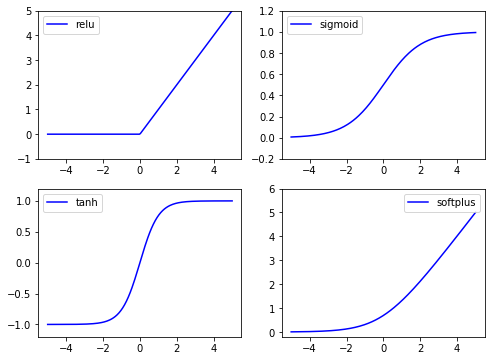

In [21]:
import matplotlib.pyplot as plt

# fake data
x = np.linspace(-5, 5, 200)     # x data, shape=(100, 1)

# following are popular activation functions
y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)
# y_softmax = tf.nn.softmax(x)  softmax is a special kind of activation function, it is about probability

sess = tf.Session()
y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])

# plt to visualize these activation function
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x, y_relu, c='blue', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x, y_sigmoid, c='blue', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x, y_tanh, c='blue', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x, y_softplus, c='blue', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

### 3.2 Optimizers
There are several optimizers. Most machine learning tasks are to minimize the loss function. In the case of loss definition, the latter work is given to the optimizer. Because the deep learning is usually the optimization of the gradient, that is to say, the optimizer is a variety of gradient descent algorithm optimization. The following code show the different kinds of optimizers.

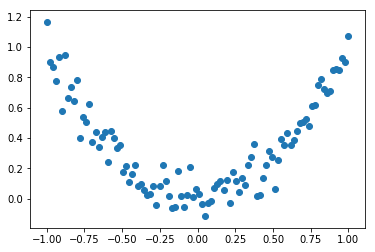

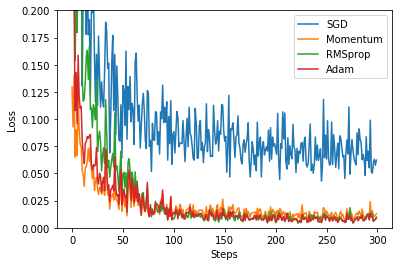

In [22]:
tf.set_random_seed(1)
np.random.seed(1)

LR = 0.01
BATCH_SIZE = 32

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

# plot dataset
plt.scatter(x, y)
plt.show()

# default network
class Net:
    def __init__(self, opt, **kwargs):
        self.x = tf.placeholder(tf.float32, [None, 1])
        self.y = tf.placeholder(tf.float32, [None, 1])
        l = tf.layers.dense(self.x, 20, tf.nn.relu)
        out = tf.layers.dense(l, 1)
        self.loss = tf.losses.mean_squared_error(self.y, out)
        self.train = opt(LR, **kwargs).minimize(self.loss)

# different nets
net_SGD         = Net(tf.train.GradientDescentOptimizer)
net_Momentum    = Net(tf.train.MomentumOptimizer, momentum=0.9)
net_RMSprop     = Net(tf.train.RMSPropOptimizer)
net_Adam        = Net(tf.train.AdamOptimizer)
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

sess = tf.Session()
sess.run(tf.global_variables_initializer())

losses_his = [[], [], [], []]   # record loss

# training
for step in range(300):          # for each training step
    index = np.random.randint(0, x.shape[0], BATCH_SIZE)
    b_x = x[index]
    b_y = y[index]

    for net, l_his in zip(nets, losses_his):
        _, l = sess.run([net.train, net.loss], {net.x: b_x, net.y: b_y})
        l_his.append(l)     # loss recoder

# plot loss history
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

### 3.3 Build a Simple Neural Netwok


#### 3.3.1 Define a Layer Function
It would be easier for us to add layers later if we have define the layer function. The function has four parameters: input value, input size, output size and excitation function. We set the default activation function to None.    
Next, we begin to define weights and bias. The normal distribution will be much better than all zeros when generating the initial parameters, so the variable "weights" is a random variable matrix. We set the value of bias to 0.1.    
Then, we define the value of input get through the neural network Wx_plus_b and activation layer.  
Last, return the layer's output. Now, we have finished the layer. The code is below. 

In [25]:
def add_layer(inputs, in_size, out_size, activation_function=None): 
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

#### 3.3.2 Introduce Data
We construct x_data and y_data as a unary quadratic function and add some noise. We use placeholders to define the input of our desired neural network. tf.placeholder() is a placeholder, where None represents any number of inputs, because the input has only one feature, so this is 1.

In [27]:
x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

#### 3.3.3 Set up the Network
The input layer here has only one attribute, so we have only one input; we can assume on our own of the hidden layer, here we assume that the hidden layer has 10 neurons. The structure of the output layer and the input layer is the same, so our output layer is also Only one layer. So, the neural network has one input layer, ten hidden layers, and one output layer.

We begin to define the hidden layer, using the previous add_layer() function, which uses tf.nn.relu activation function that comes with Tensorflow.   
Next, define the output layer. The input at this time is the output of the hidden layer l1, the input has 10 layers (the output layer of the hidden layer), and the output has 1 layer.   
Then, we calculate the error of the prediction value and the true value, and then average the difference between the two.

In [31]:
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))

Next, how to make machine learning improve its accuracy? The value in tf.train.GradientDescentOptimizer() is usually less than 1, and this is taken as 0.1, which means that the error loss is minimized with an efficiency of 0.1.  
Then, we initialize the variables and use Session to run.

In [33]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#### 3.3.3 Train the Network
We'll train train_step next. Use Session to run the data of each training and gradually improve the prediction accuracy of the neural network. We print the error every 50 steps.

In [36]:
for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
    # to see the step improvement
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))

0.00407427
0.00402902
0.00398609
0.00395363
0.0039171
0.00388133
0.00384739
0.00380727
0.00376424
0.00372377
0.00368834
0.00365821
0.00362427
0.00359168
0.00355952
0.00352266
0.00348279
0.00344626
0.00341398
0.00337907


From the result, we can see the error is decreasing.

## 4.Convolutional Neural Network Basic

Convolutional Neural Network(CNN) is a sequence of layers, and every layer of a ConvNet transforms one volume of activations to another through a differentiable function. CNN are widely used in image and video recognition, recommender systems and natural language processing. We use three main types of layers to build CNN architectures: Convolutional Layer, Pooling Layer, and Fully-Connected Layer (exactly as seen in regular Neural Networks). We will stack these layers to form a full ConvNet architecture. The following picture shows the architecture of CNN:
[<img src="https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/jcr:content/mainParsys/image_copy.adapt.full.high.jpg/1517522275430.jpg">](https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/jcr:content/mainParsys/image_copy.adapt.full.high.jpg/1517522275430.jpg)

We will go into more details below:  
INPUT will hold the raw pixel values of the image, and with three color channels R,G,B.  
CONVOLUTION layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume.   
RELU layer will apply an elementwise activation function, such as the max(0,x) thresholding at zero. This leaves the size of the volume unchanged.   
POOLING layer will perform a downsampling operation along the spatial dimensions (width, height).  
FLATTEN layer will change the data into a vector form.  
FULLY CONNECTED layer will compute the class scores. As with ordinary Neural Networks and as the name implies, each neuron in this layer will be connected to all the numbers in the previous volume.

## 5.Build CNN Models to Classify CIFAR-10

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

First, we'll build a simple CNN to see the classification accuracy of CIFAR-10. This model contains only one layer.

In [40]:
#load CIFAR-10
from utils import get_CIFAR10_data
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
# clear old variables
tf.reset_default_graph()

# setup input (e.g. the data that changes every batch)
# The first dim is None, and gets sets automatically based on batch size fed in
X = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int64, [None])
is_training = tf.placeholder(tf.bool)

def model1(X,y):
    # define our weights (e.g. init_two_layer_convnet)
    
    # setup Convolution layer variables
    Wconv1 = tf.get_variable("Wconv1", shape=[7, 7, 3, 32])#shape=[patch,patch,channel,number of filters]
    bconv1 = tf.get_variable("bconv1", shape=[32])
    
    #FC: Use H_n = 1 + (H + 2 * pad - HH)/stride to calculate the dimention of output of each filter
    # so 1+(32-7)/2 = 13. Each neural will output a 13*13 matrix
    # There are 32 filters in total,so the total number of output is 13*13*32 = 5408
    W1 = tf.get_variable("W1", shape=[5408, 10])
    b1 = tf.get_variable("b1", shape=[10])

    # define our graph (e.g. two_layer_convnet)
    #strides[batch, height, width, channels], in general, strides = [1, X, X, 1] 
    a1 = tf.nn.conv2d(X, Wconv1, strides=[1,2,2,1], padding='VALID') + bconv1
    h1 = tf.nn.relu(a1)
    #"-1" is the size of that dimension is computed so that the total size remains constant
    h1_flat = tf.reshape(h1,[-1,5408])
    y_out = tf.matmul(h1_flat,W1) + b1
    return y_out

y_out = model1(X,y)

# define our loss
total_loss = tf.losses.hinge_loss(tf.one_hot(y,10),logits=y_out)
mean_loss = tf.reduce_mean(total_loss)

# define our optimizer
optimizer = tf.train.AdamOptimizer(5e-4) # select optimizer and set learning rate
train_step = optimizer.minimize(mean_loss)

Training
Iteration 0: with minibatch training loss = 11.3 and accuracy of 0.11
Iteration 100: with minibatch training loss = 1.13 and accuracy of 0.2
Iteration 200: with minibatch training loss = 0.76 and accuracy of 0.27
Iteration 300: with minibatch training loss = 0.564 and accuracy of 0.38
Iteration 400: with minibatch training loss = 0.527 and accuracy of 0.33
Iteration 500: with minibatch training loss = 0.53 and accuracy of 0.39
Iteration 600: with minibatch training loss = 0.468 and accuracy of 0.31
Iteration 700: with minibatch training loss = 0.368 and accuracy of 0.39
Epoch 1, Overall loss = 0.758 and accuracy of 0.304


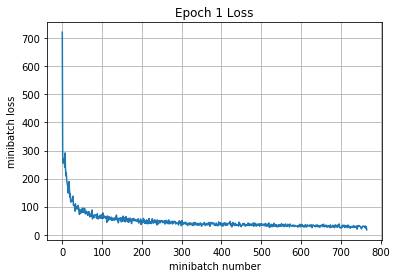

Validation
Epoch 1, Overall loss = 0.442 and accuracy of 0.356


In [42]:
with tf.Session() as sess:
    with tf.device("/cpu:0"): #"/cpu:0" or "/gpu:0" 
        sess.run(tf.global_variables_initializer())
        print('Training')
        run_model(sess,y_out,mean_loss,X,y,is_training,X_train,y_train,1,64,100,train_step,True)
        print('Validation')
        run_model(sess,y_out,mean_loss,X,y,is_training,X_val,y_val,1,64)

We can see from the result that only one layer of CNN performs bad. So, we add one more convolution layer and pooling layer to make the result better.

In [48]:
# clear old variables
tf.reset_default_graph()

# define our input (e.g. the data that changes every batch)
# The first dim is None, and gets sets automatically based on batch size fed in
X = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int64, [None])
is_training = tf.placeholder(tf.bool)

def model2(X,y):
    # define our weights (e.g. init_two_layer_convnet)
    # setup variables
    Wconv1 = tf.get_variable("Wconv1", shape=[7, 7, 3, 32])
    bconv1 = tf.get_variable("bconv1", shape=[32])
    W1 = tf.get_variable("W1", shape=[5408, 1024])
    b1 = tf.get_variable("b1", shape=[1024])
    W2 = tf.get_variable("W2", shape=[1024, 10])
    b2 = tf.get_variable("b2", shape=[10])

    # define our graph (two_layer_convnet)
    a1 = tf.nn.conv2d(X, Wconv1, strides=[1,1,1,1], padding='VALID') + bconv1
    #print (a1.shape)
    h1 = tf.nn.relu(a1)
    h2 = tf.contrib.layers.batch_norm(h1, 
                                      center=True, scale=True, 
                                      is_training=True,
                                      scope='bn')
    #add pooling layer
    pool1 = tf.layers.max_pooling2d(inputs=h2, pool_size=[2, 2], strides=2)
    #flatten layer
    pool1_flat = tf.reshape(pool1,[-1,5408])
    y_1 = tf.matmul(pool1_flat,W1) + b1
    y_1_new = tf.nn.relu(y_1)
    y_out = tf.matmul(y_1_new,W2) + b2
    
    return y_out
# define model
y_out = model2(X,y)

# define our loss
total_loss = tf.losses.hinge_loss(tf.one_hot(y,10),logits=y_out)
mean_loss = tf.reduce_mean(total_loss)

# define our optimizer
optimizer = tf.train.AdamOptimizer(5e-4) # select optimizer and set learning rate
train_step = optimizer.minimize(mean_loss)

Training
Iteration 0: with minibatch training loss = 1.23 and accuracy of 0.2
Iteration 100: with minibatch training loss = 0.213 and accuracy of 0.5
Iteration 200: with minibatch training loss = 0.207 and accuracy of 0.52
Iteration 300: with minibatch training loss = 0.198 and accuracy of 0.58
Iteration 400: with minibatch training loss = 0.228 and accuracy of 0.44
Iteration 500: with minibatch training loss = 0.209 and accuracy of 0.5
Iteration 600: with minibatch training loss = 0.196 and accuracy of 0.55
Iteration 700: with minibatch training loss = 0.192 and accuracy of 0.55
Epoch 1, Overall loss = 0.226 and accuracy of 0.501


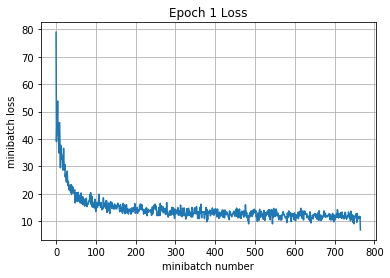

Validation
Epoch 1, Overall loss = 0.178 and accuracy of 0.581


In [49]:
with tf.Session() as sess:
    with tf.device("/cpu:0"): #"/cpu:0" or "/gpu:0" 
        sess.run(tf.global_variables_initializer())
        print('Training')
        run_model(sess,y_out,mean_loss,X,y,is_training,X_train,y_train,1,64,100,train_step,True)
        print('Validation')
        run_model(sess,y_out,mean_loss,X,y,is_training,X_val,y_val,1,64)

As the result shows, the accuracy increased a lot after more layers were added. Also, more time is needed to train the model, you may use a gpu rather than your own machine to train complex models. Will the results get better and better only if we add more layers? The answer is no. There are many classical models such as LeNet，AlexNet，VGG-Net，GoogLeNet and ResNet. The accuracy can reach 95% of trainning CIFAR-10.

## Summary and references

This tutorial mainly introduced the basic methods of TensorFlow and how to set up neural network models, especially CNN models. Much more detail about the libraries and questions on TensorFlow and CNN are available from the following links.

1. TensorFlow docs: https://www.tensorflow.org/
2. Stanford CS231n: http://cs231n.github.io/convolutional-networks/